# Is My State Good Enough for Mental Health?

## Project Report: Data Science and Big Data, Fall 2020

## Akshay Oza and Mansi Panchamia

## October 23, 2020

## Table of Contents:
<ul>
<li>Problem Domain</li>
<li>Data</li>
<li>Methodology</li>   
<li>Overall trends in the United States</li>
<li>Mental Health Trends by Gender</li>
<li>Mental Health Trends by Race</li>
<li>Relation between Mental Health and Well-Being Index</li>
<li>Relation between Mental Health and Access to Mental Health</li>
<li>Recommendations</li>
<li>Future Scope</li>
<li>Appendix</li>
</ul>

### Problem Domain
Mental health issues have long held stigmas, despite the fact that one-in-five US adults will suffer from a mental health condition during his or her lifetime, and countless family members and friends will be affected in the process.  Whether you suffer from mild depression or anxiety, or you’re helping a loved one cope with a more serious condition such as schizophrenia or bipolar disorder, you probably realize that it is not only the condition that’s difficult to live with, but also the social isolation. 
Mental health illness is not a wound we can see, hence it often becomes difficult for family and friends to empathize with the patient. Another major challenge: mental illness is incredibly heterogeneous, encompassing both mild and severe symptoms, and including everything from social anxiety to schizophrenia. The journey towards healing in such cases is often a lonely one, as people do not understand what it is like to have a mental health concern. 

States have significant power in making decisions about their mental health systems so mental health regulations and available services can look very different from state to state and even from county to county. State mental health systems must meet certain standards set by the federal government, but they are free to expand beyond what exists at the federal level and improve services, access, and protections for consumers. This project seeks to provide multi-layered analysis for the average number of unhealthy mental days faced by people in each state over the years 2009-2018 and further differentiate it by race and gender. External factors in these states which might have an impact on the mental health of its residents and how they have changed over time, are also taken into consideration.

### Data
The primary data source for this project is the <a href= https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Mental-Health/ixrt-gnsg> Centre for Disease Control </a> data about mental health across all the state in the US between year 2009-2018. The total number of rows in our dataset is 6960 and number of columns is 16.

**Some of the major attributes in the data are:**
- `state` : Name of the State
- `year` : Year of the record
- `location_id` : FIPS State ID
- `mean` : average number of unhealthy mental days for the overall population
- `age_adjusted_mean`: average number of unhealthy mental days to compare different age group structures
- `upper_CI`: Upper limit of 95% confidence interval for the `mean` or `age_adjusted_mean`
- `lower_CI`: Lower limit of 95% confidence interval for the `mean` or `age_adjusted_mean`
- `stratification`: stratification by gender, race or overall

*The primary data source is unclean and would need to be cleaned before merging with the other tables*
<br>For understanding the correlation between number of unhealthy mental days and other factors, various data sets such as insurance statistics from <a href =https://www.kff.org/other/state-indicator> KFF </a>, mental health care rankings from <a href= https://www.mhanational.org/issues/mental-health-america-all-data> Mental Health America </a>, and Well-Being Index for States in the US (2014-2018) by <a href= https://wellbeingindex.sharecare.com/download-reports/> Gallup </a> will be used. This data would provide nuanced insights and enable factoring external causes to paint a more comprehensive picture. Most of this data is currently in the forms of report (PDF format) and would need to be converted to data format.

### Methodology




**Methodology for the project can be categorized broadly in following 5 steps**

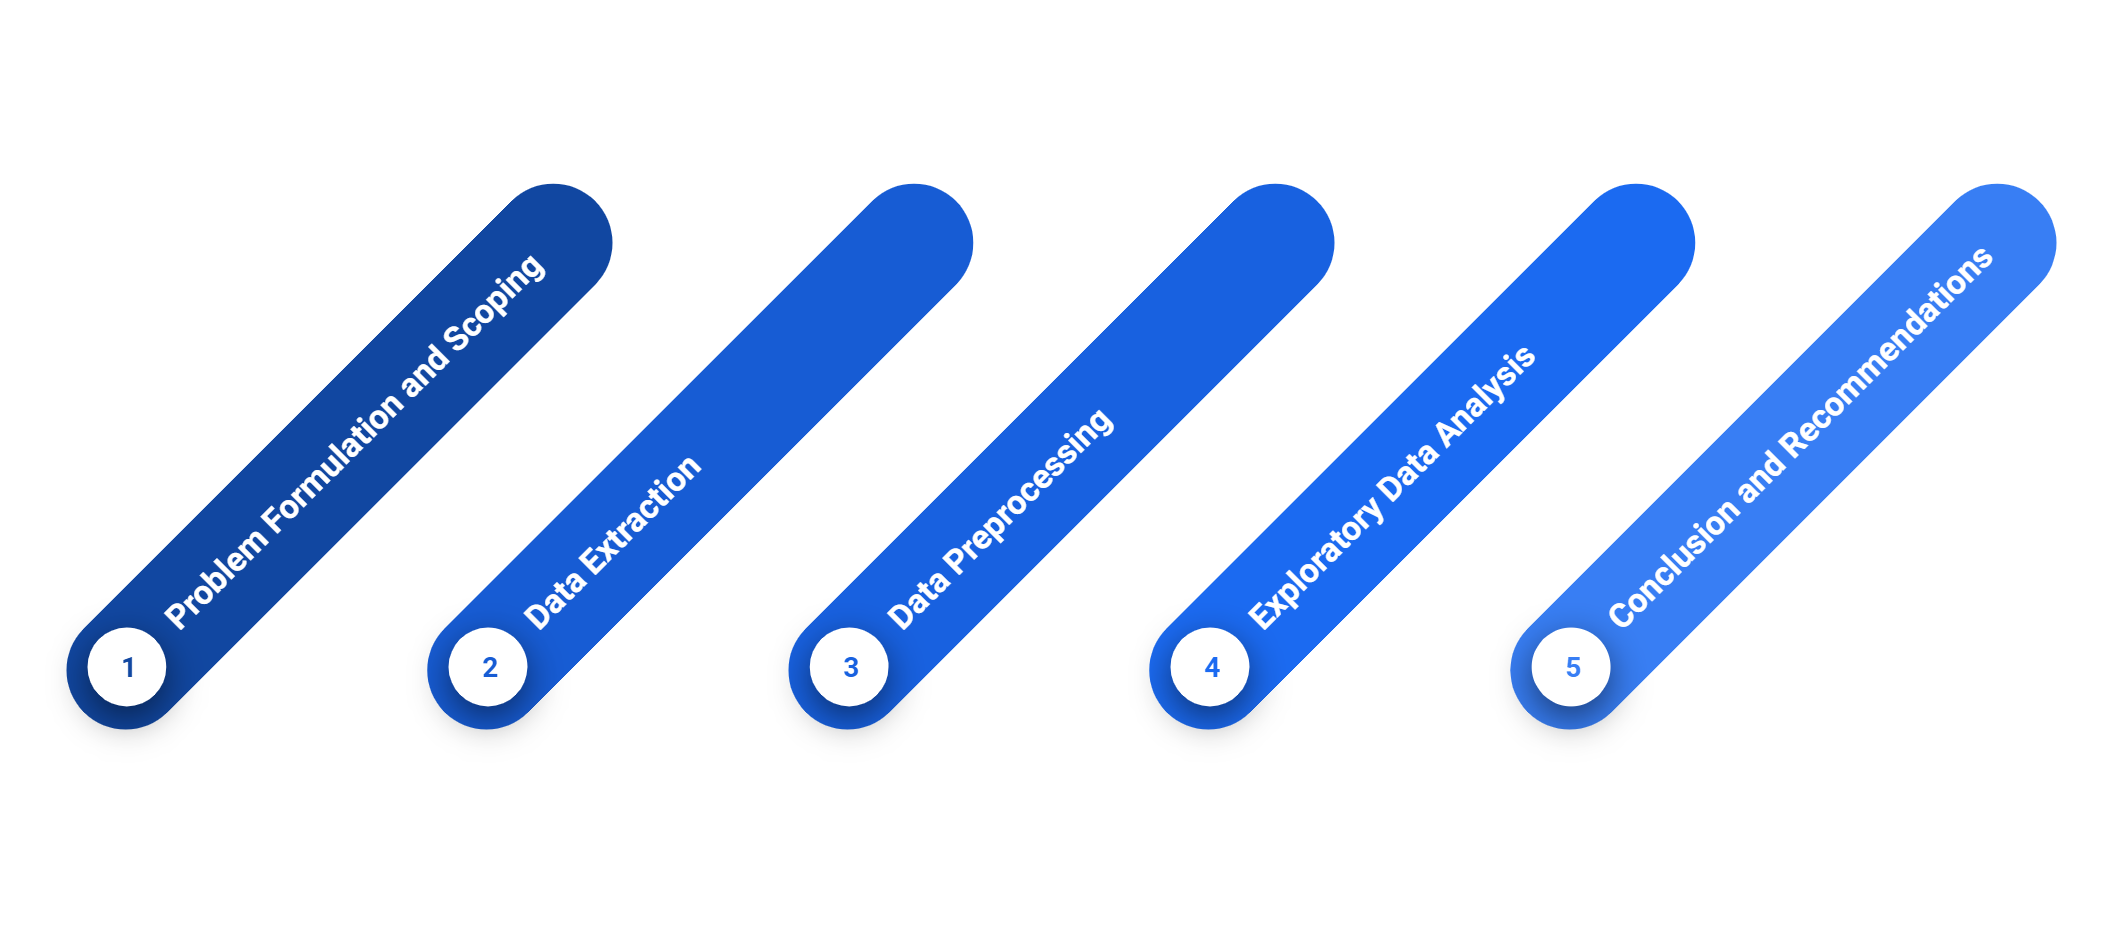

In [9]:
from IPython.display import Image
Image(filename='methodology.png') 


In [1]:
# import the following libraries to run visualisations in this report
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
import numpy as np; np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

### Part 0: Data Preprocessing 

The files `Cleaned_MentalHealthData.csv`, `master_wb.csv` and `mha_master.csv` were generated using preporocessing that can be seen in our Intermediate Progress/Data Preporocessing Jupyter Notebook. These CSVs have been imported throughout the analysis in our report in the form of `pandas DataFrame`

### Part 1: 8% increase in average number of days per month from 2011 to 2018 when people felt "down, depressed, or hopeless nearly every day” 

In [2]:
# Primary dataset
df = pd.read_csv('Cleaned_MentalHealth_Data.csv')
df = df[df.DataValueTypeID != 'AGEADJMEAN']


In [3]:
df_Overall = df[df.OVERALL == 'Overall']

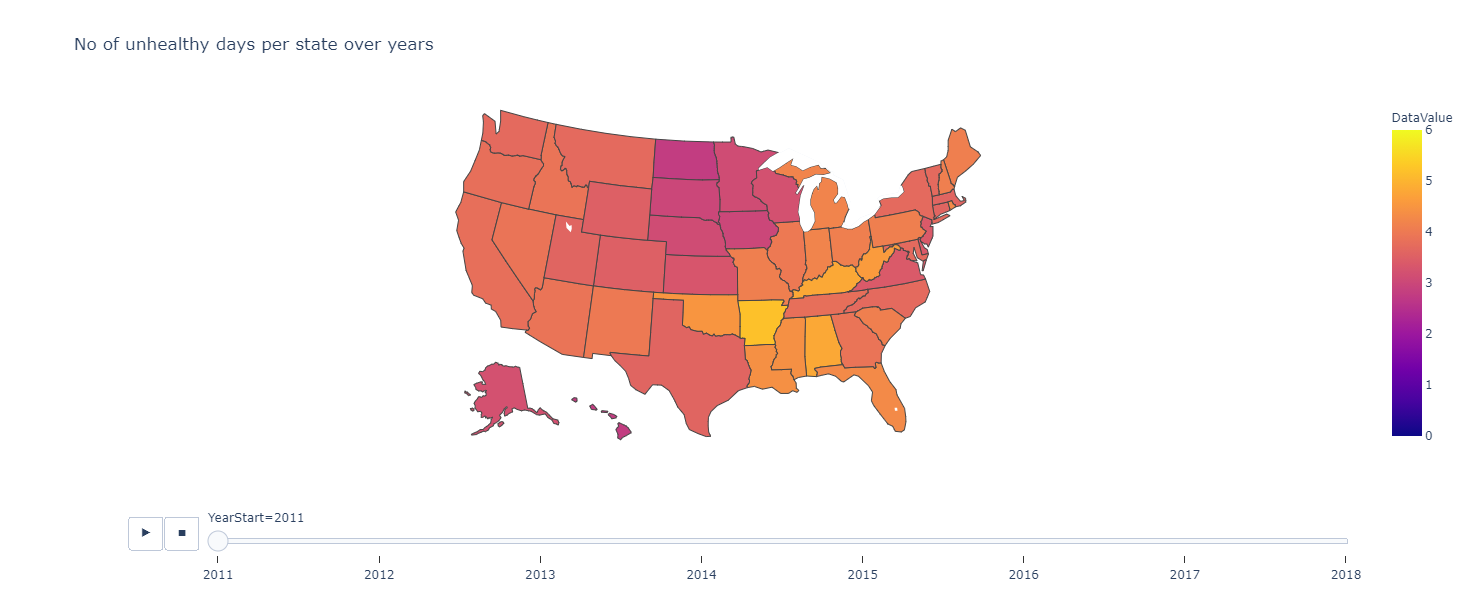

In [4]:
'''Bird's eye view of the United States over years 2011 - 2018. To use the animation, please press the play button. 
   To pause on a particular year, press the stop button. To get exact number of unhealthy mental days per month, please 
   hover over state of your choice. ''' 
fig = px.choropleth(df_Overall, 
              locations = 'LocationAbbr',
              color="DataValue", 
              animation_frame="YearStart",
              color_continuous_scale="Plasma",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 6),
              title='No of unhealthy days per state over years',
              height=600
             )
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 #Comment out the line if a faster animation is required
fig.show(renderer = 'jupyterlab')

In [9]:
df_Overall[df_Overall.YearStart == 2011].DataValue.mean() 
'''Average number of unhealthy mental days per month experienced by US citizens in 2011'''

3.788679245283018

In [10]:
df_Overall[df_Overall.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental days per month experienced by US citizens in 2011'''

4.0943396226415105

In 2011, adult survey respondents have said they have an average of 26.21 healthy days (or 3.79 unhealthy days) a month, which means that 87.4% of all adult days are reported as healthy. In 2018, the average number of healthy days recorded decreased to 25.91 days (or 4.09 unhealthy days) a month, showing an increase of 8% in reported unhealthy days per month.
Visually speaking, the animation frame gets brighter (as the values increase) as years pass, showing a marked increase in the average number of unhealthy days reported across states. 

#### South Dakota, Hawaii have the least increase of 6.67% in average number of unhealthy days and West Virginia has seen the highest increase of 21% in average number of unhealthy days 

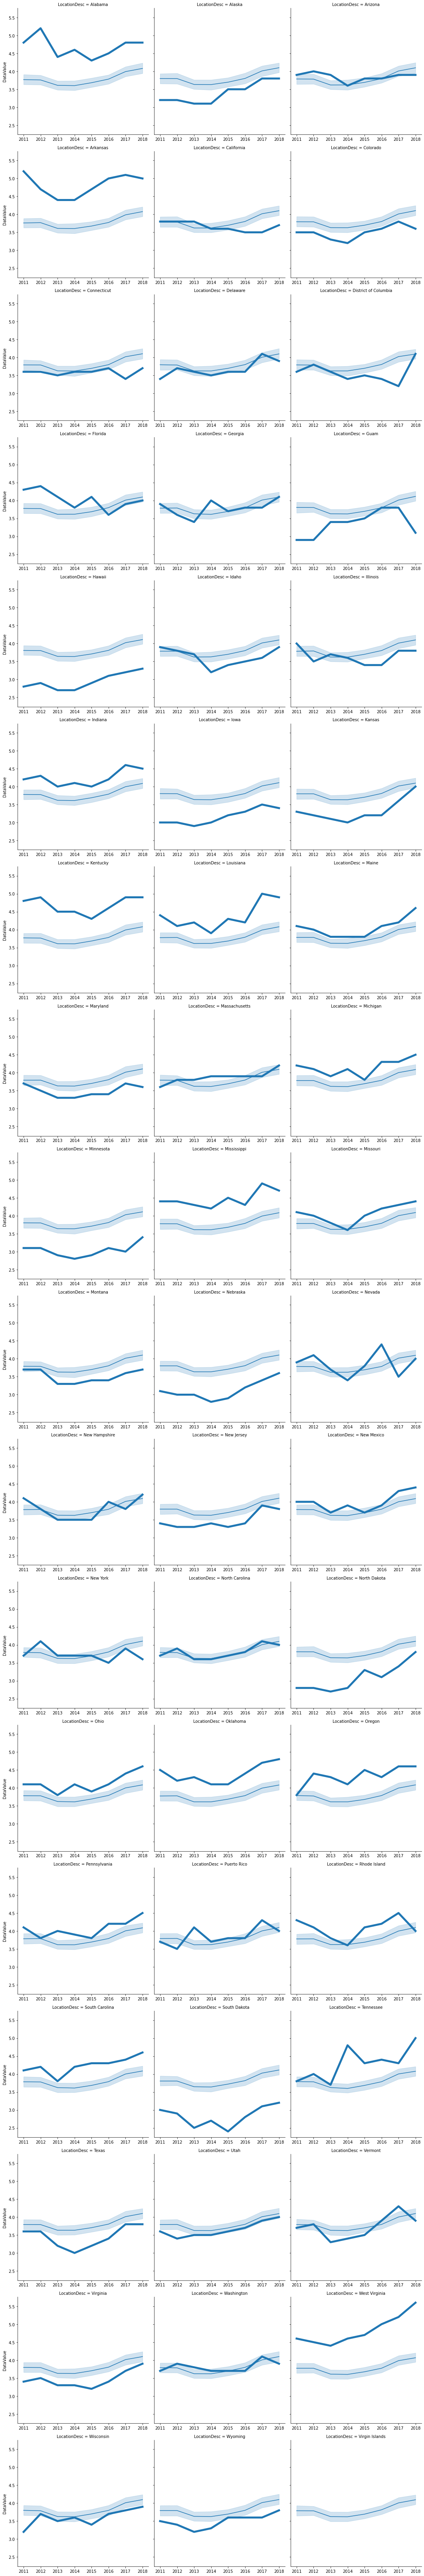

In [11]:
'''Plotting average number of unhealthy mental days per month in each state individually, against nation wide average'''
g1 = sns.relplot(
    data=df_Overall,
    x="YearStart", y="DataValue",
    col="LocationDesc",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3, linewidth=5, zorder= 5
)
axes = g1.fig.axes
states = df_Overall.LocationDesc.unique()

for index, state in enumerate (states, start=0):
    df_temp = df_Overall.loc[df['LocationDesc'] != state]
   # palette1 = sns.color_palette('Greys', n_colors=50)
    sns.lineplot(ax = axes[index], x="YearStart", y="DataValue", data=df_temp)
    #axes[index].get_legend().remove()
    axes[index].set_xlabel('')

**Key Takeaways:** <br>
1. Some states like Alaska, Hawaii, Iowa, Minnesota have consistently performed better than the national average, across all years, implying its citizens experience less unhealthy mental days. <br>
2. States like Alabama, West Virginia, Kentucky, Arkanas have consistently perfromed worse than the national average, across all years, implying its citizens experience more unhealthy mental days. <br>

<br> These findings are consistent with <a href = "https://www.cdc.gov/hrqol/pdfs/mhd.pdf">findings </a> reported by CDC, all the way back in 2000, implying that citizens of certain states consistently feel "down, depressed, or hopeless" more often than citizens of other states, and the only difference from back then is that the frequency of such days has only increased. These findings imply that citizens across the United States feel depressed more often than they used to, and the distribution of this increase is not uniform - infact, we see high volality across states. Part three of the report is dedicated to exploring why some states are worse off than others. 
<br> It is important to note here that figures above only encapsulate overall trends across states. These numbers do not control for any variation by gender, or race. A breakdown by gender and race, in each state is visualised in part two. 

### Part 2.1: In 2018, females experienced 37% more unhealthy mental days per month than men, up from 30% in 2011

Part 1 of this report visualised an overall decline in number of unhealthy days, not broken down by gender, race or other confounding variables. Part 2 of this report will focus on impact of one's gender on their average number of unhealthy days as well break down this impact state-wise.

**Part i: Exploring overall trends in average number of unhealthy mental days across years, by gender**

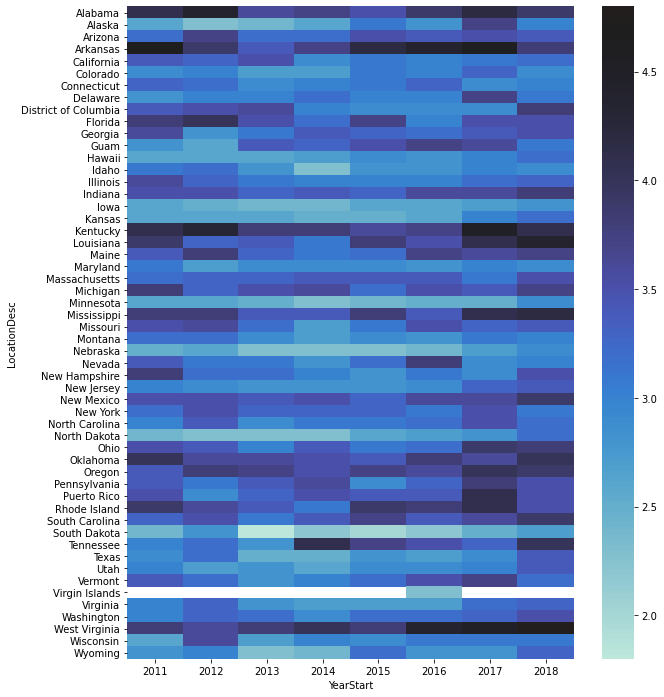

In [12]:
df_Male = df[df.GENDER == 'Male']
df_Male = df_Male[['YearStart', 'LocationDesc', 'DataValue']]
Male_pt = df_Male.pivot("LocationDesc", "YearStart", "DataValue")
midpoint = (df.DataValue.max() - df.DataValue.min()) / 2
fig, ax = plt.subplots(figsize=(10,12))  
Male_heatmap = sns.heatmap(Male_pt, center= midpoint)

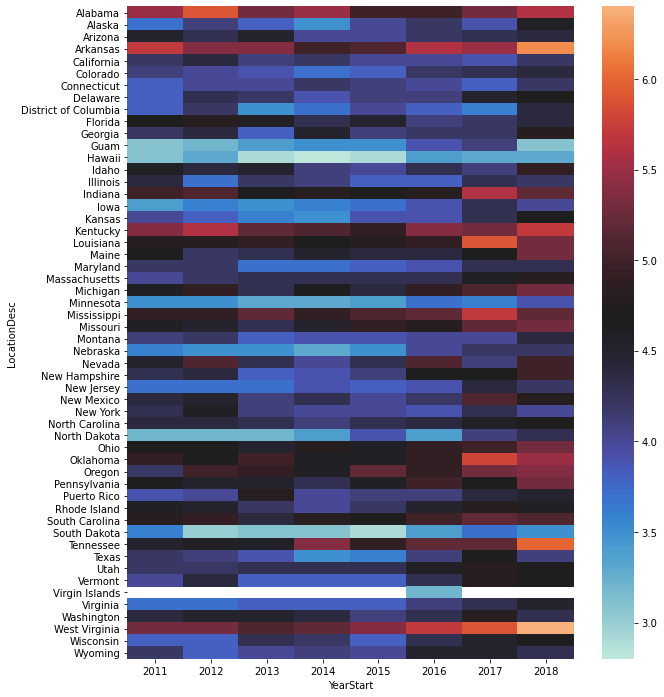

In [13]:
df_Female = df[df.GENDER == 'Female']
df_Female = df_Female[['YearStart', 'LocationDesc', 'DataValue']]
Female_pt = df_Female.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  
Female_heatmap = sns.heatmap(Female_pt, center = midpoint)

At a glance, females have had more unhealthy mental days than men since 2011, and the proportion of states where females experience higher unhealthy mental days per month has only increased over years. Not only has there always been a gap in numbers but the size of this disparity has increased from 2011 to 2018. 

In [14]:
df_Male[df_Male.YearStart == 2011].DataValue.mean()

3.2622641509433974

In [15]:
df_Male[df_Male.YearStart == 2018].DataValue.mean()

3.437735849056605

In [16]:
df_Female[df_Female.YearStart == 2011].DataValue.mean()

4.2735849056603765

In [17]:
df_Female[df_Female.YearStart == 2018].DataValue.mean()

4.715094339622641

**Key Takeaways**: <br>1. Gap between unhealthy mental days experienced by women and men increased by 23.3% from 2011 to 2018 <br> 2. Males saw an increase of 5.38% in unhealthy mental days from 2011 to 2018 <br> 3. Females saw an increase of 10.33% in unhealthy mental days during the same period



These findings are consistent with literature disseminated by <a href = "https://www.mayoclinic.org/diseases-conditions/depression/in-depth/depression/art-20047725"> Mayo Clinic </a>, <a href = "https://ramh.org/guide/gender-differences-in-mental-health/"> RAHM </a>, and <a href = "https://www.nytimes.com/2018/11/14/smarter-living/stress-gap-women-men.html"> New York Times </a>, amongst others. 
Women are twice as likely to suffer from severe stress and anxiety as men, according to a <a href = "https://onlinelibrary.wiley.com/doi/full/10.1002/brb3.497"> 2016 study </a> published in The Journal of Brain & Behavior. The American Psychological Association reports a gender gap year after year showing that women consistently report higher stress levels. <br>
Life circumstances and cultural stressors can play a role, too. Although these stressors also occur in men, it's usually at a lower rate. Factors that may increase the risk of depression in women include:
<br> 1. **Unequal power and status**: Women are much more likely than men to live in poverty, causing concerns such as uncertainty about the future and decreased access to community and health care resources. These issues can cause feelings of negativity, low self-esteem and lack of control over life.<br>2. **Work overload**: Often women work outside the home and still handle home responsibilities. Many women deal with the challenges of single parenthood, such as working multiple jobs to make ends meet. Also, women may be caring for their children while also caring for sick or older family members.<br>3. **Sexual or physical abuse**: Women who were emotionally, physically or sexually abused as children or adults are more likely to experience depression at some point in their lives than those who weren't abused. Women are more likely than men to experience sexual abuse. 
<br> Another reason for disparities between male and female mental health is postpartum depression - Many new mothers find themselves sad, angry and irritable, and experience crying spells soon after giving birth. These feelings — sometimes called the baby blues — are normal and generally subside within a week or two. 

**Part ii: Tennessee, Idaho have the highest gender gap in average number of unhealthy mental days from 2011-2018. Hawaii and Guam have the lowest**

In [18]:
df_Gender = df[df.GENDER.isin(['Male','Female'])]

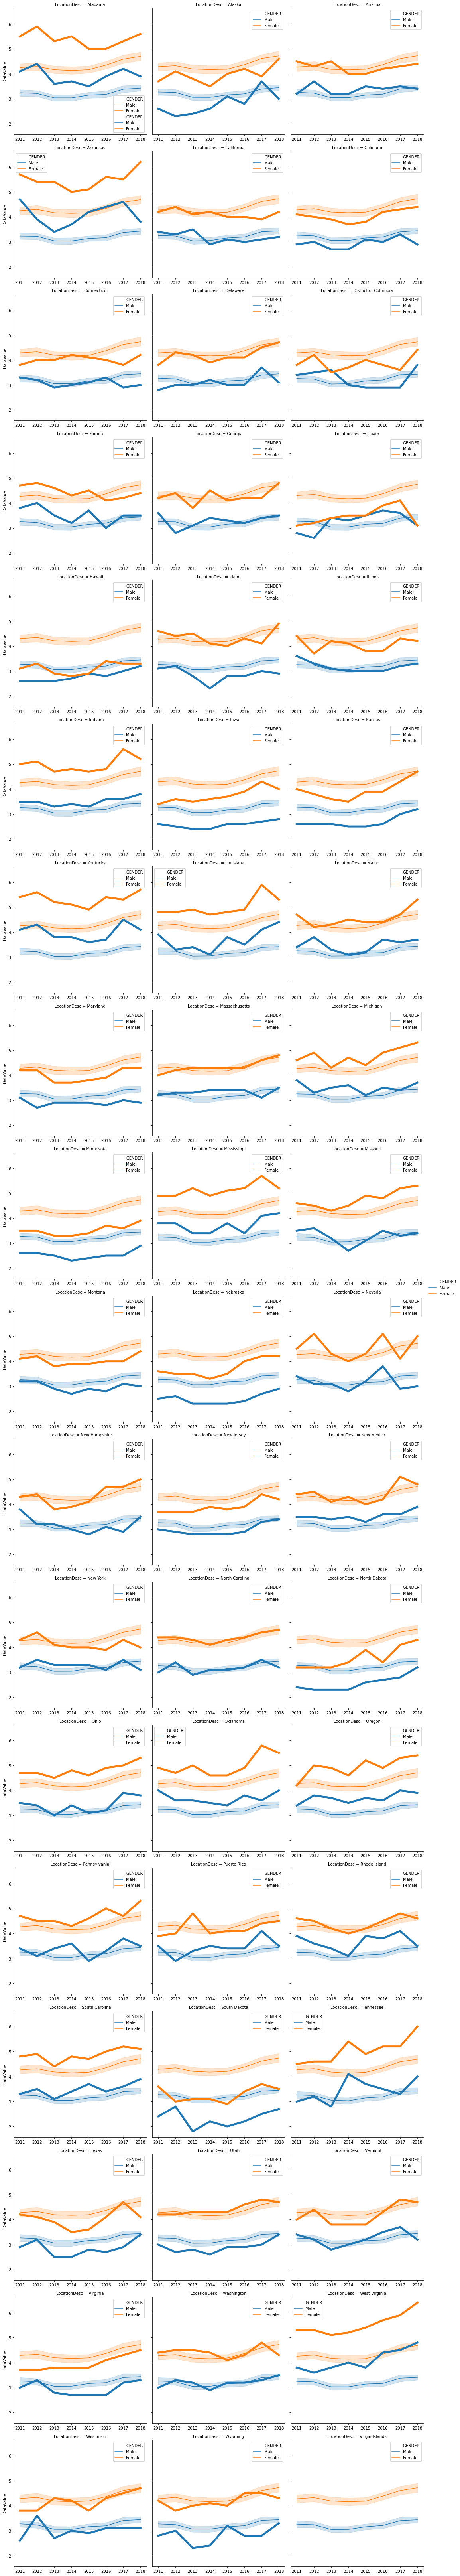

In [19]:
'''Plotting individual states against the national average for males and females'''
g1 = sns.relplot(
    data=df_Gender,
    x="YearStart", y="DataValue",
    hue="GENDER", col="LocationDesc",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3, linewidth=5, zorder= 5
)
axes = g1.fig.axes
states = df_Overall.LocationDesc.unique()

for index, state in enumerate (states, start=0):
    df_temp = df_Gender.loc[df['LocationDesc'] != state]
   # palette1 = sns.color_palette('Greys', n_colors=50)
    sns.lineplot(ax=axes[index],x="YearStart", y="DataValue", hue = "GENDER", data=df_temp)
    #axes[index].get_legend().remove()
    axes[index].set_xlabel('')


In [73]:
'''Quantifying gender gap in each state, across years 2011-2018'''
df_Male= df_Male.sort_values(by=['YearStart', 'LocationDesc'])
df_Female= df_Female.sort_values(by=['YearStart', 'LocationDesc'])
df_Female['Difference'] = df_Female['DataValue'].values - df_Male.DataValue.values
Series_Gender_Difference = df_Female.groupby('LocationDesc').Difference.mean()


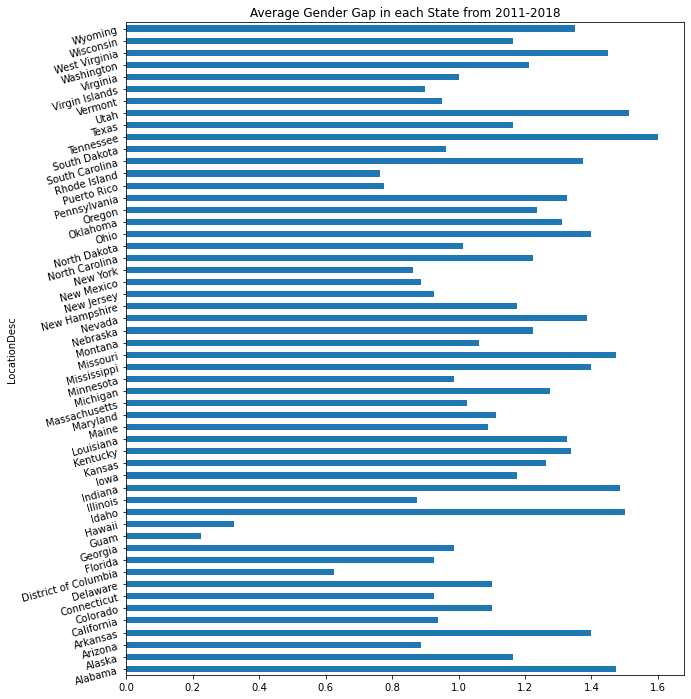

In [80]:
'''Visualising the difference'''
fig, ax = plt.subplots(figsize=(10,12))  
Series_Gender_Differences = Series_Gender_Difference.sort_values
Series_Gender_Difference.plot.barh(rot=15, title="Average Gender Gap in each State from 2011-2018");
plt.show(block=True);
 

### Part 2.2 People of Color experienced 31.38% more unhealthy mental days per month in 2011. This gap decreased to 21.71% in 2018

**Part i: Exploring overall trends in racial inequality in average number of unhealthy mental days**

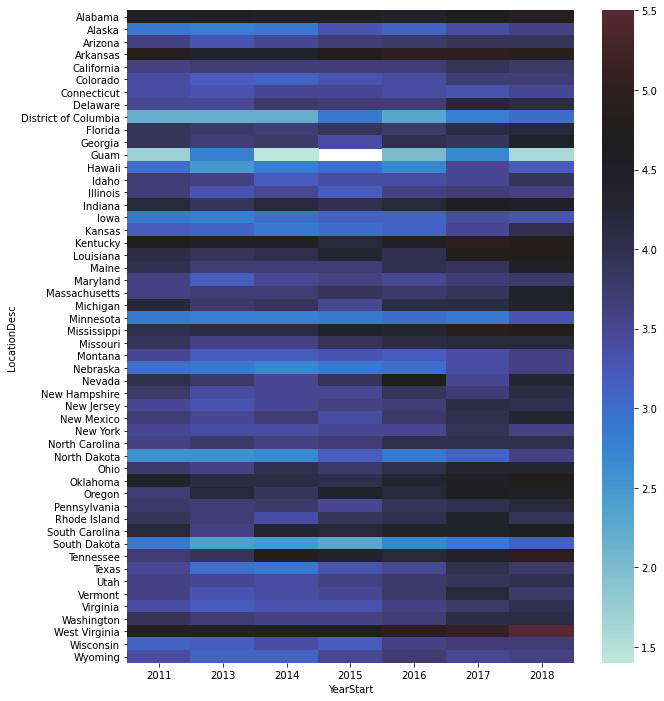

In [23]:
'''Snapshot of state-trends for White Population from 2011-2018'''
df_White = df[df.RACE == 'White, non-Hispanic']
df_White = df_White[['YearStart', 'LocationDesc', 'DataValue']]
White_pt = df_White.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  #comment the line to see a smaller visualisation
White_heatmap = sns.heatmap(White_pt, center = midpoint)

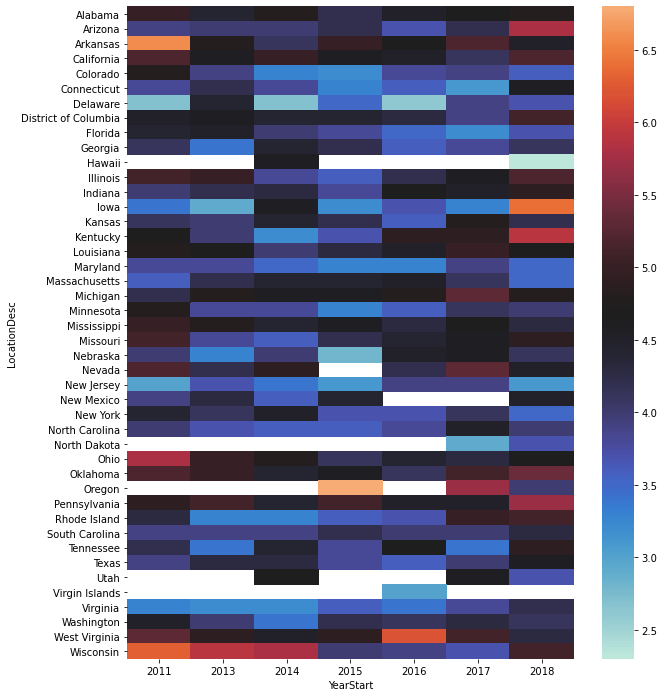

In [24]:
'''Snapshot of state-trends for Black Population from 2011-2018''
df_Black = df[df.RACE == 'Black, non-Hispanic']
df_Black = df_Black[['YearStart', 'LocationDesc', 'DataValue']]
Black_pt = df_Black.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  
Black_heatmap = sns.heatmap(Black_pt, center = midpoint)

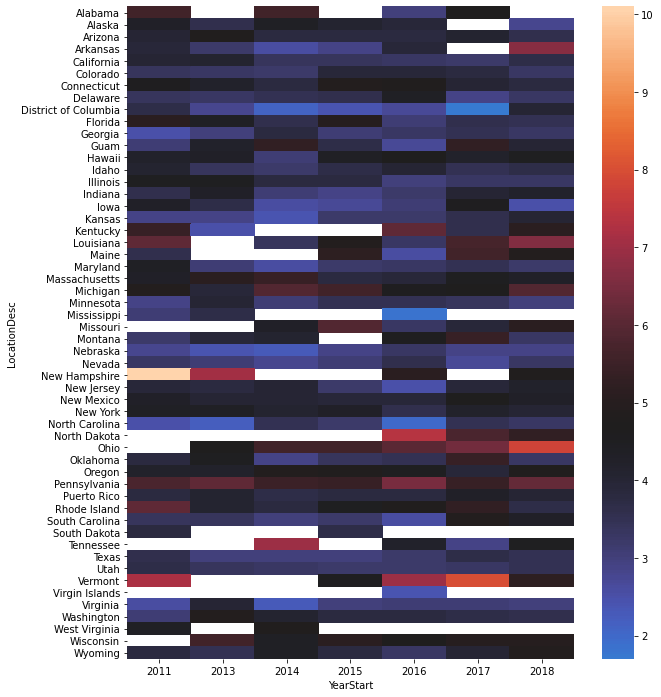

In [25]:
'''Snapshot of state-trends for Hispanic Population from 2011-2018'''
df_Hispanic = df[df.RACE == 'Hispanic']
df_Hispanic = df_Hispanic[['YearStart', 'LocationDesc', 'DataValue']]
Hispanic_pt = df_Hispanic.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  
Hispanic_heatmap = sns.heatmap(Hispanic_pt, center = midpoint)

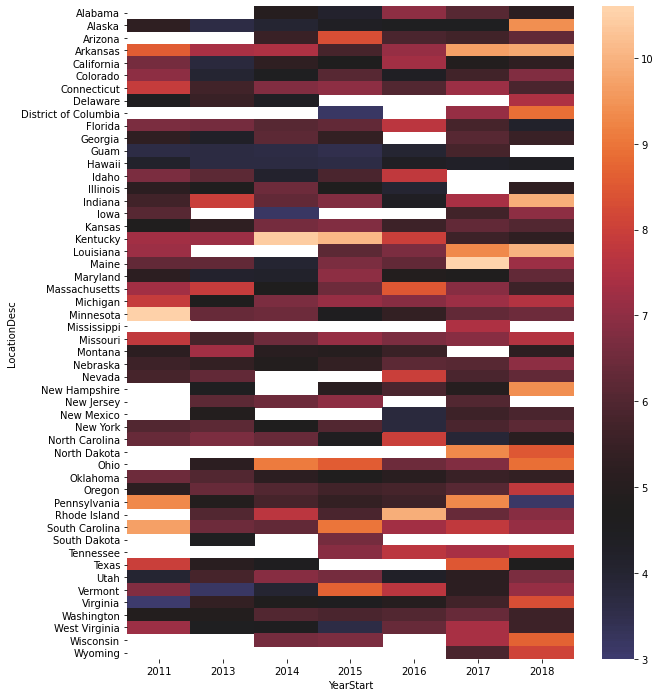

In [26]:
'''Snapshot of state-trends for Multiracial Population from 2011-2018'''
df_Multiracial = df[df.RACE == 'Multiracial, non-Hispanic']
df_Multiracial = df_Multiracial[['YearStart', 'LocationDesc', 'DataValue']]
Multiracial_pt = df_Multiracial.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  
Multiracial_heatmap = sns.heatmap(Multiracial_pt, center = midpoint)

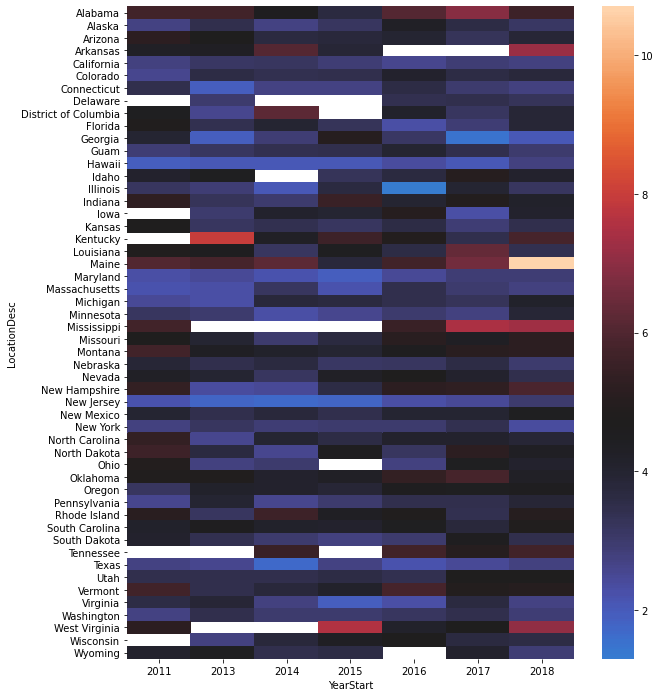

In [27]:
'''Snapshot of state-trends for Population not identifying as any of above races from 2011-2018'''
df_Other = df[df.RACE == 'Other, non-Hispanic']
df_Other = df_Other[['YearStart', 'LocationDesc', 'DataValue']]
Other_pt = df_Other.pivot("LocationDesc", "YearStart", "DataValue")
fig, ax = plt.subplots(figsize=(10,12))  
Other_heatmap = sns.heatmap(Other_pt, center = midpoint)

Not only are there disparities between people of color and white population, but also within minority mental health.
> Race matters when it comes to mental health

Findings about higher unhealthy mental days experienced by People Of Color are consistent with <a href = "https://www.psychiatry.org/psychiatrists/cultural-competency/education/mental-health-facts"> research </a> by American Psychiatry Association. Mental health issues affect everyone, but people of color — Black, Latinx, Asian and Native American people — have higher rates of some mental health disorders and face greater disparities in getting help than White people. Those issues are primarily due to lack of access to services resulting from institutional discrimination, interpersonal racism and stigma — which can all harm the psyche of people of color in places where they are not the majority. 

In [28]:
df_White[df_White.YearStart == 2011].DataValue.mean() 
'''Average number of unhealthy mental health days experienced by White population in 2011'''

3.6134615384615385

In [29]:
df_White[df_White.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental health days experienced by White population in 2018'''

4.021153846153846

In [30]:
df_Black[df_Black.YearStart == 2011].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Black population in 2011'''

4.453846153846155

In [31]:
df_Black[df_Black.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Black population in 2018'''

4.446511627906975

In [32]:
df_Hispanic[df_Hispanic.YearStart == 2011].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Hispanic population in 2011'''

4.160416666666667

In [33]:
df_Hispanic[df_Hispanic.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Hispanic population in 2018'''

4.183673469387756

In [34]:
df_Multiracial[df_Multiracial.YearStart == 2011].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Multiracial population in 2011'''

6.352631578947369

In [35]:
df_Multiracial[df_Multiracial.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental health days experienced by Multiracial population in 2018'''

6.785106382978725

In [36]:
df_Other[df_Other.YearStart == 2011].DataValue.mean()
'''Average number of unhealthy mental health days experienced by population not identifying by any of the above in 2011'''

4.0276595744680845

In [37]:
df_Other[df_Other.YearStart == 2018].DataValue.mean()
'''Average number of unhealthy mental health days experienced by population not identifying by any of the above in 2018'''

4.171153846153847

**Key Takeaways**: <br>1. Multiracial population has historically had higher number of unhealthy mental days among all demographics - multiracial population reported have 75.9% more unhealthy mental days per month than White population in 2011<br>2. White populalion saw an increase of 11.9% in unhealthy mental days per month from 2011 to 2018 <br>3. Among minority groups, multiracial population reported the highest increase in unhealthy mental days per month from 2011 to 2018, up by 6.8%

Some of these disparities can also be attributed to **intergenerational trauma** - how oppressive events that impacted one generation tend to be carried over, as far as feelings, in later generations. Latinx people also face discrimination, in their case based on their languages, ethnicity and class, said Jasmine Mena, an assistant professor of psychology and affiliated faculty in Latin American studies at Bucknell University in Lewisburg, Pennsylvania.

> “The impact on their mental health is never positive,” Mena said. “It impacts self-esteem and substance use, and it’s associated with many (negative) outcomes.”

<br>**Political events and discourse regarding immigration** can be harmful to mental health even for those who are documented, because they still become targets, Mena said.
<br>Racially discriminatory events have led Black people to be in a state of high arousal — which means a heightened level of situational awareness and vigilance, said Helen Neville, a professor of educational psychology and African American studies at the University of Illinois at Urbana-Champaign. That means they’re anticipating discriminatory encounters based on their race before such events happen. The daily instinct to interpret social situations and decisions through a racial lens is stressful, and that awareness is just one form of racial trauma experienced by Black people. **Microaggressions** cumulatively take their toll, and so do emotional and physical responses to vicarious and direct experiences with racial violence and racism. Centuries of racial terror, violence and oppression have also left an indelible mark on the Black psyche. Due to location and lower-income status, Black people sometimes lack access to mental health services. Latinx people might also if they’re under- or uninsured, Mena said, especially if they’re undocumented immigrants.
<br> Crucially, data highlights enormous burden on multiracial people: They face unique stressors, and often find that it is difficult to connect with others - even with other multiracial people. More often than not, the parents of multiracial people will not necessarily understand their struggles. Even among multiracial people, their experiences are so unique that talking with other multiracial people can feel disjointed, and there can be a failure to connect. There are many other reasons why minorities may have higher numbers.
<br>1. The belief that mental health treatment “doesn’t work”
<br>2. The high level of mental health stigma in minority populations
<br>3. A mental health system weighted heavily towards non-minority values and culture norms
<br>4. Racism, bias, and discrimination in treatment settings
<br>5. Language barriers and an insufficient number of providers who speak languages other than English
<br>6. A lack of adequate health insurance coverage (and even for people with insurance, high deductibles and co-pays make it difficult to afford)
<br> The decrease in mental health gap between White and non-White population is not consistent with research reported by <a href = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6532404/"> National Institutes of Health </a>, <a href= "https://www.mhanational.org/issues/black-and-african-american-communities-and-mental-health"> Mental Health America </a>, amongst others. This can possibly mean that due to increase in mental health awareness, and engagement to reduce stigmas surrounding mental health, there are increasing instances of people reporting their unhealthy mental days, with White population may be more likely to report than other races, possibly due to cultural or social factors discussed above. 




**Part ii: Racial disparities in average number of unhealthy mental days from 2011-2018**

In [39]:
df_Race = df[df.RACE.isin(['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other, non-Hispanic', 'Multiracial, non-Hispanic'])]

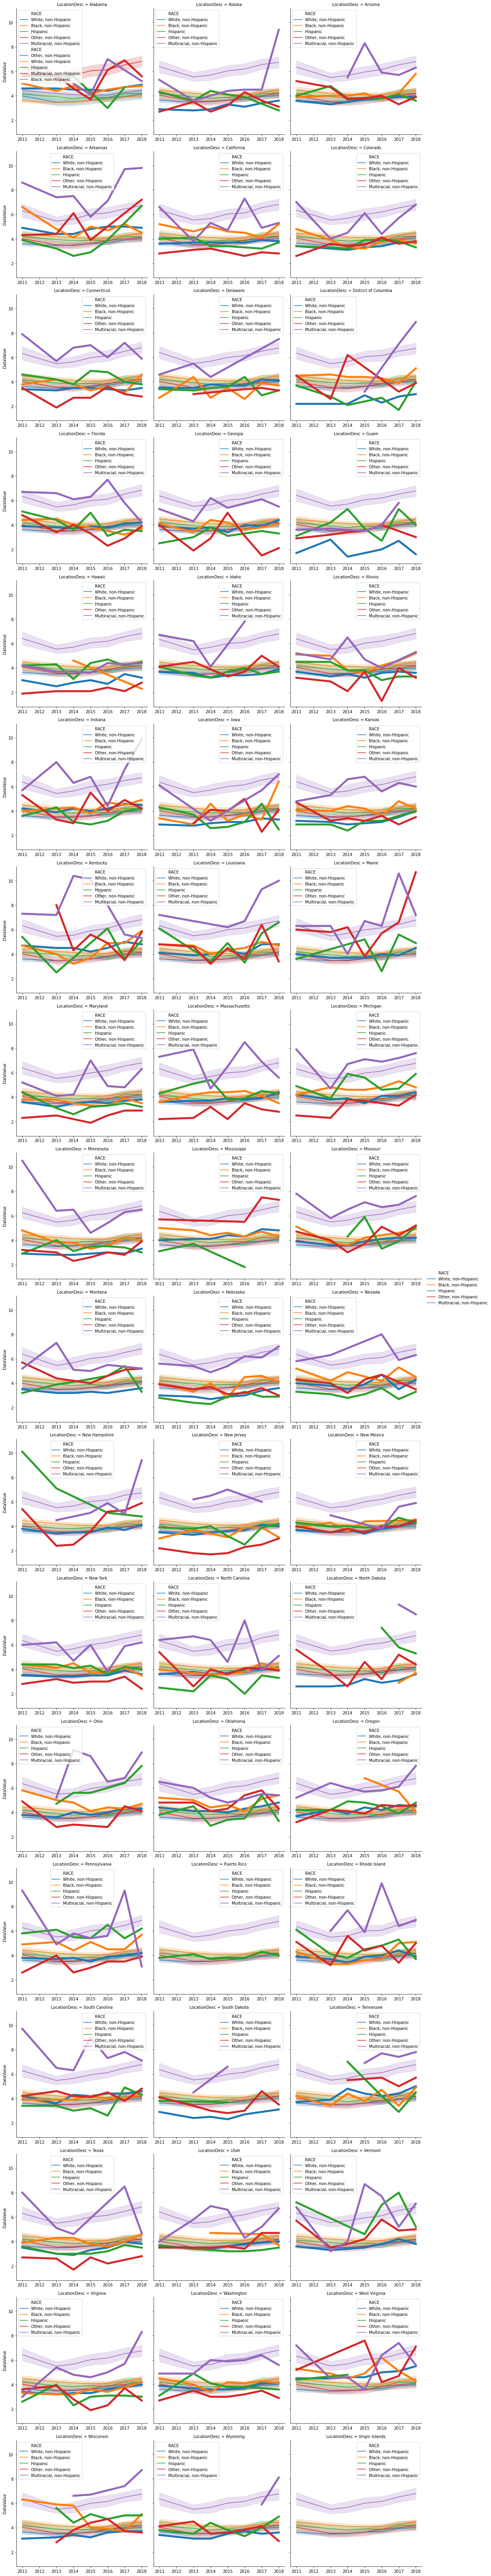

In [40]:
g1 = sns.relplot(
    data=df_Race,
    x="YearStart", y="DataValue",
    hue="RACE", col="LocationDesc",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3, linewidth=5, zorder= 5
)
axes = g1.fig.axes
states = df_Overall.LocationDesc.unique()

for index, state in enumerate (states, start=0):
    df_temp = df_Race.loc[df['LocationDesc'] != state]
   # palette1 = sns.color_palette('Greys', n_colors=50)
    sns.lineplot(ax=axes[index],x="YearStart", y="DataValue", hue = "RACE", data=df_temp)
    #axes[index].get_legend().remove()
    axes[index].set_xlabel('')


Our data did not allow for uniform quantification of racial gap in average number of unhealthy mental days. There are 281 entries for average number of unhealthy mental days for People Of Color, opposed to 331 entries for White population. There are some states like Wyoming, Wisconsin, Utah which did not report any data until a few years back for various minority groups. 

In [2]:
df= pd.read_csv('Cleaned_MentalHealth_Data.csv')

### Part 3.1 Mentally Unhealthy Days and Well-Being of a State

**Creating a DataFrame with necessary columns for the correlation analysis**

In [3]:
new_mh_data= df[['YearStart','LocationDesc','DataValue','DataValueTypeID','OVERALL']][df['OVERALL']=='Overall'][df['DataValueTypeID']=='MEAN'][df['YearStart']>2014]

<ipython-input-3-6c589eaf80b2>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-3-6c589eaf80b2>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [4]:
new_mh_data.reset_index(inplace=True)

In [5]:
new_mh_data

index  YearStart   LocationDesc  DataValue DataValueTypeID  OVERALL
0     2872       2015        Alabama        4.3            MEAN  Overall
1     2885       2015         Alaska        3.5            MEAN  Overall
2     2900       2015        Arizona        3.8            MEAN  Overall
3     2914       2015       Arkansas        4.7            MEAN  Overall
4     2931       2015     California        3.6            MEAN  Overall
..     ...        ...            ...        ...             ...      ...
208   5938       2018       Virginia        3.9            MEAN  Overall
209   5955       2018     Washington        3.9            MEAN  Overall
210   5971       2018  West Virginia        5.6            MEAN  Overall
211   5983       2018      Wisconsin        3.9            MEAN  Overall
212   6000       2018        Wyoming        3.8            MEAN  Overall

[213 rows x 6 columns]

**Reading the Well-Being Index Data into a DataFrame**

In [6]:
wb_data= pd.read_csv('master_wb.csv')

In [7]:
merged_mh_wb_data= pd.merge(new_mh_data,wb_data,how='right',left_on=['YearStart','LocationDesc'],right_on=['Year','State'])

In [8]:
merged_mh_wb_data.head()

index  YearStart LocationDesc  DataValue DataValueTypeID  OVERALL  \
0   2872       2015      Alabama        4.3            MEAN  Overall   
1   2885       2015       Alaska        3.5            MEAN  Overall   
2   2900       2015      Arizona        3.8            MEAN  Overall   
3   2914       2015     Arkansas        4.7            MEAN  Overall   
4   2931       2015   California        3.6            MEAN  Overall   

   Unnamed: 0  State_Num       State  Year  Well-Being Index  Purpose Rank  \
0           0          1     Alabama  2015              61.8            13   
1           1          2      Alaska  2015              64.1             5   
2           2          3     Arizona  2015              63.0             6   
3           3          4    Arkansas  2015              60.9            25   
4           4          5  California  2015              62.7            10   

   Social Rank  Financial Rank  Community Rank  Physical Rank  
0           12              42              21             41  
1            5               1               7              6  
2            7              23              16              8  
3           49              38              23             47  
4           18              21              29              3

In [9]:
drop_cols= ['index','DataValueTypeID','State_Num','State','Year']
merged_mh_wb_data.drop(drop_cols,axis=1,inplace=True)
merged_mh_wb_data.head()

YearStart LocationDesc  DataValue  OVERALL  Unnamed: 0  Well-Being Index  \
0       2015      Alabama        4.3  Overall           0              61.8   
1       2015       Alaska        3.5  Overall           1              64.1   
2       2015      Arizona        3.8  Overall           2              63.0   
3       2015     Arkansas        4.7  Overall           3              60.9   
4       2015   California        3.6  Overall           4              62.7   

   Purpose Rank  Social Rank  Financial Rank  Community Rank  Physical Rank  
0            13           12              42              21             41  
1             5            5               1               7              6  
2             6            7              23              16              8  
3            25           49              38              23             47  
4            10           18              21              29              3

### Scatter Plots to establish correlation between mentally unhealthy days and different well-being index/rank

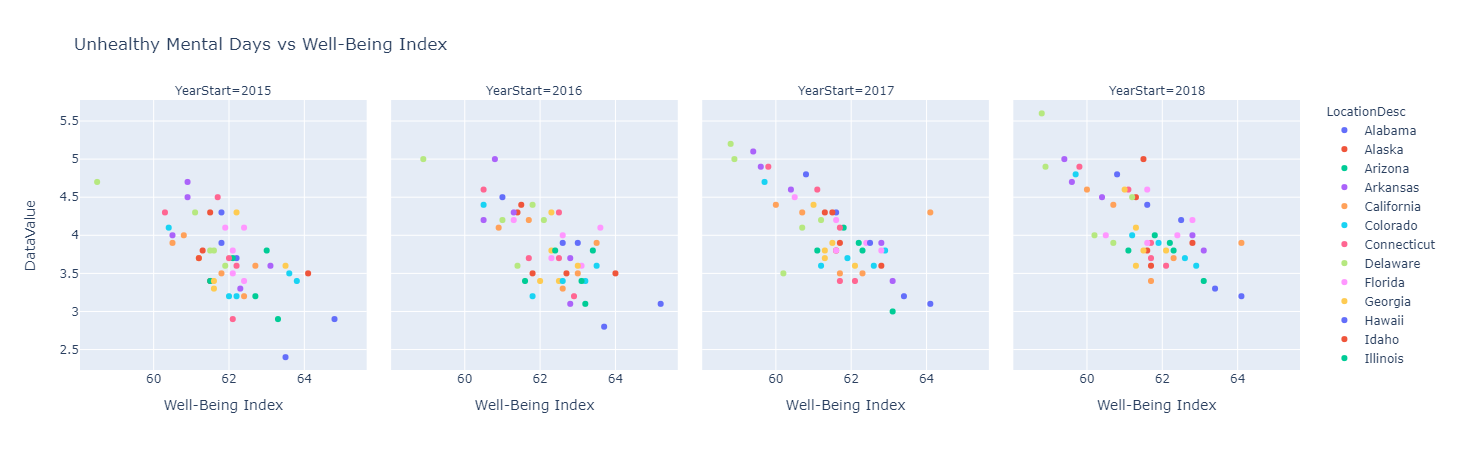

In [10]:
scatter_wbindex=px.scatter(merged_mh_wb_data, x="Well-Being Index", y="DataValue",color="LocationDesc" ,facet_col="YearStart",title="Unhealthy Mental Days vs Well-Being Index")
scatter_wbindex.show(renderer="jupyterlab")

**It is very clear that there is a strong negative correlation between `Well-Being Index` and Mentally Unhealthy Days (`DataValue`). The states with higher well being index have lower number of mentally unhealthy days**

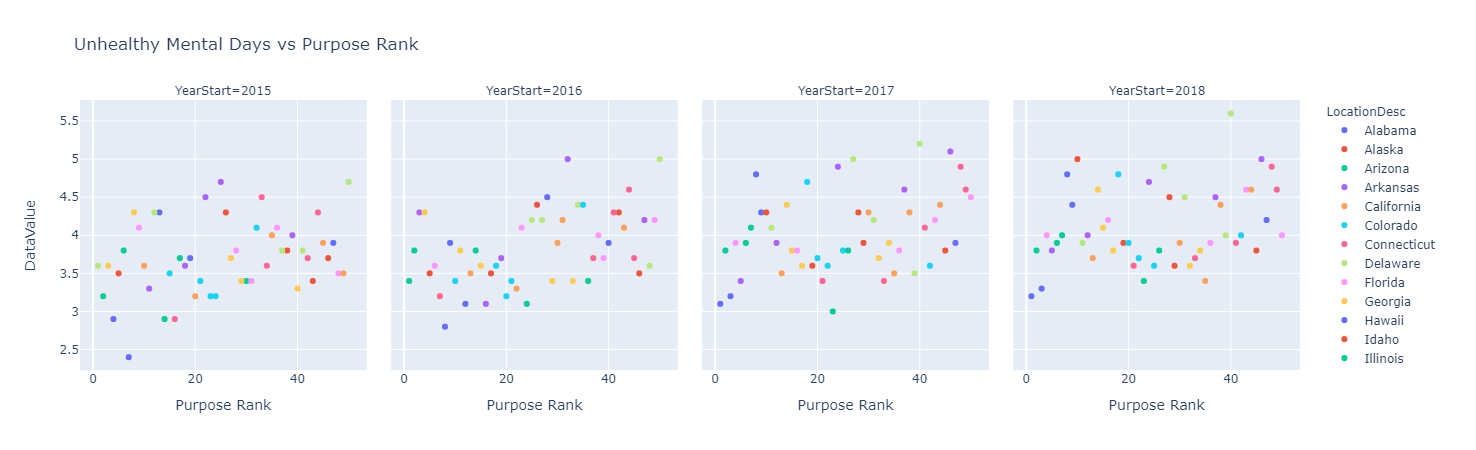

In [11]:
scatter_purpose=px.scatter(merged_mh_wb_data, x="Purpose Rank", y="DataValue",color="LocationDesc" ,facet_col="YearStart",title="Unhealthy Mental Days vs Purpose Rank")
scatter_purpose.show(renderer="jupyterlab")

**As we can see there is almost no correlation between `Purpose Rank` and Mentally Unhealthy Days (`DataValue`)**

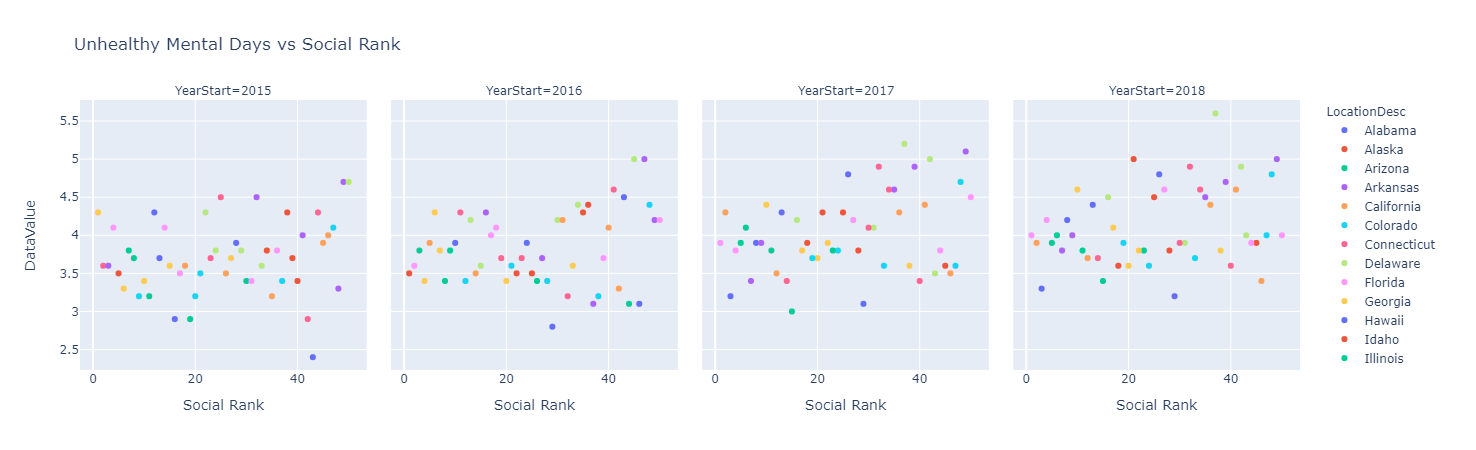

In [12]:
scatter_social=px.scatter(merged_mh_wb_data, x="Social Rank", y="DataValue",color="LocationDesc" ,facet_col="YearStart",title="Unhealthy Mental Days vs Social Rank")
scatter_social.show(renderer="jupyterlab")

**As we can see there is almost no correlation between `Social Rank` and Mentally Unhealthy Days (`DataValue`)**

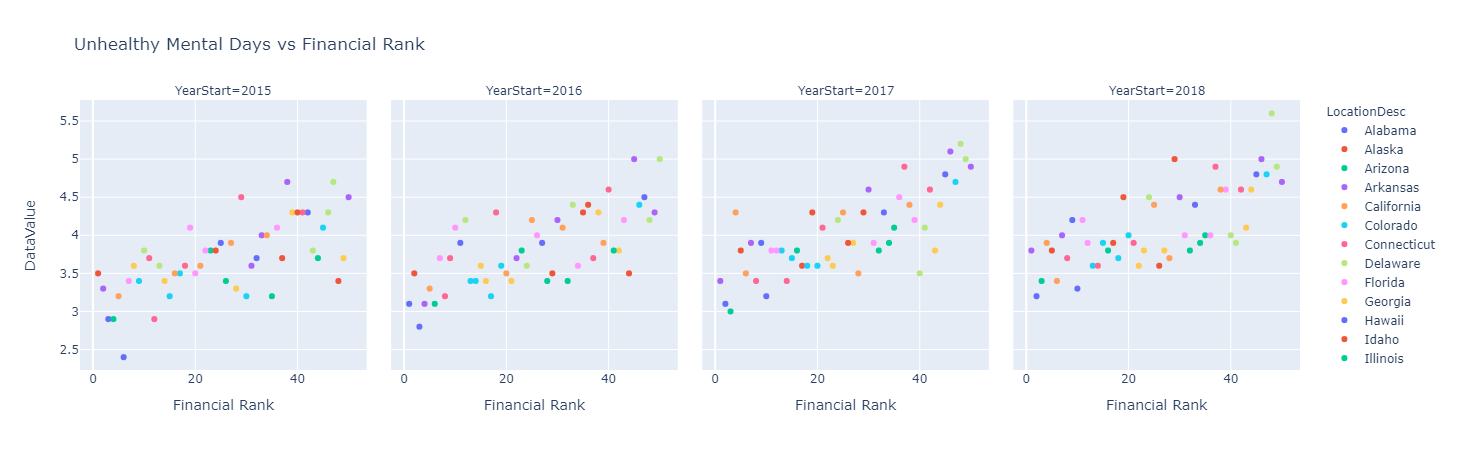

In [13]:
scatter_financial=px.scatter(merged_mh_wb_data, x="Financial Rank", y="DataValue",color="LocationDesc" ,facet_col="YearStart",title="Unhealthy Mental Days vs Financial Rank")
scatter_financial.show(renderer="jupyterlab")

**It is very clear that there is a strong positive correlation between `Financial Rank` and Mentally Unhealthy Days (`DataValue`). The states with higher financial rank for well-being have higher number of mentally unhealthy days. This basically means that the states with better financial well-being have less mentally unhealthy days and states with poor/worse financial well-being have higher mentally unhealthy days.This suggests that the economy/financial health of a state plays an important role in mental health of its residents**

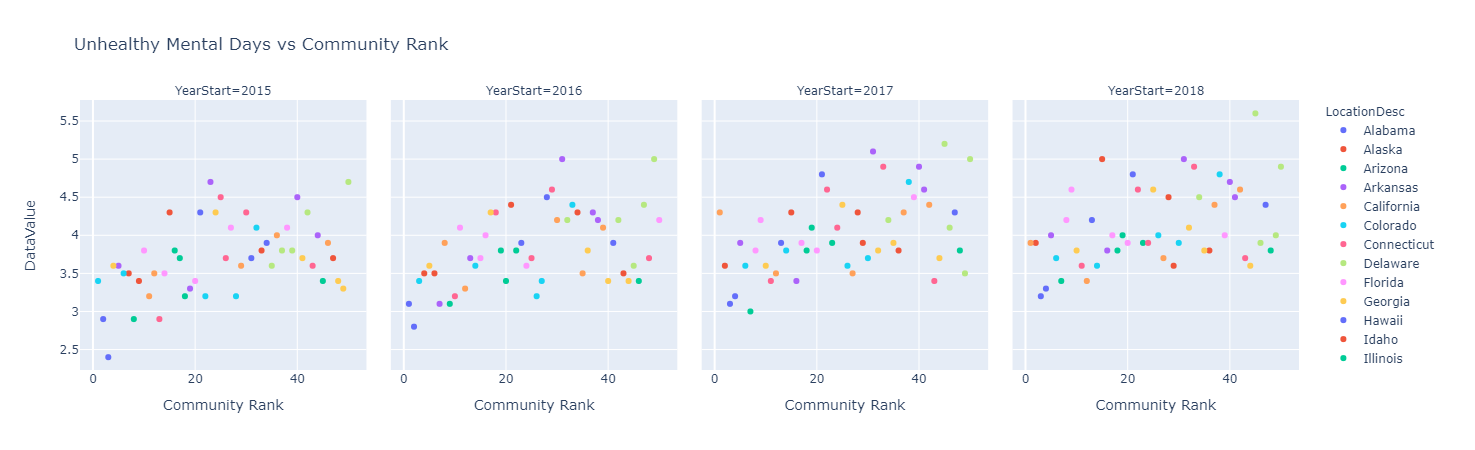

In [14]:
scatter_community=px.scatter(merged_mh_wb_data, x="Community Rank", y="DataValue",color="LocationDesc" ,facet_col="YearStart",title="Unhealthy Mental Days vs Community Rank")
scatter_community.show(renderer="jupyterlab")

**As we can see there is a slight positive correlation between `Community Rank` and Mentally Unhealthy Days (`DataValue`). This suggests that sense of belonging and community in the state plays an important role in mental health of its residents**

### Exploring the correlation between `DataValue` and `Well-Being Index` and `Financial Rank`

In [31]:
merged_mh_wb_data_2015= merged_mh_wb_data[merged_mh_wb_data['YearStart']==2015]


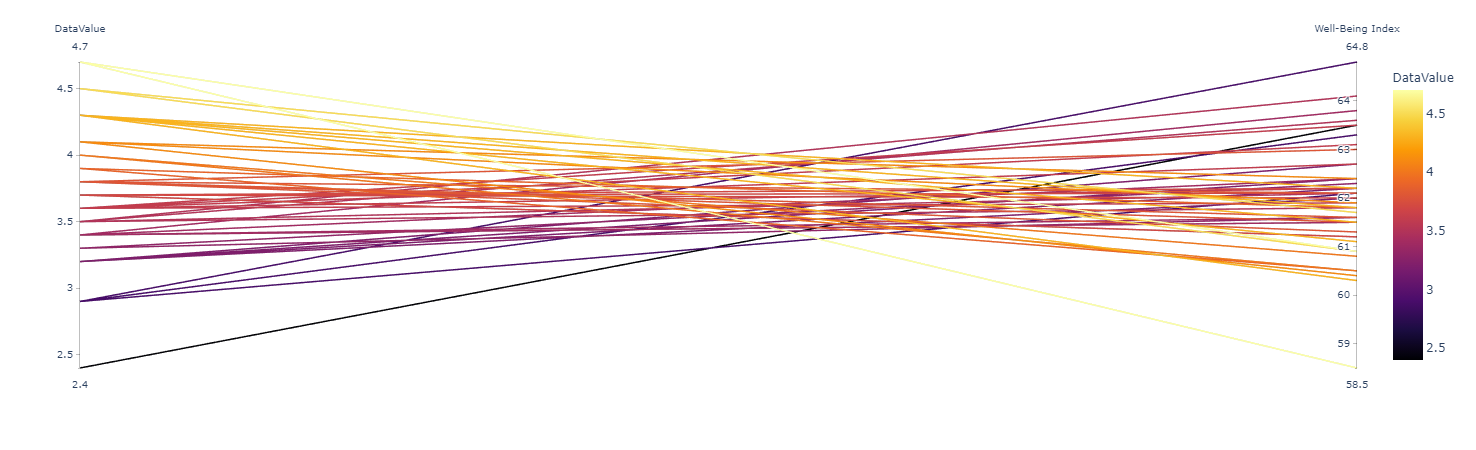

In [32]:
fig = px.parallel_coordinates(merged_mh_wb_data_2015,dimensions=['LocationDesc','DataValue','Well-Being Index'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

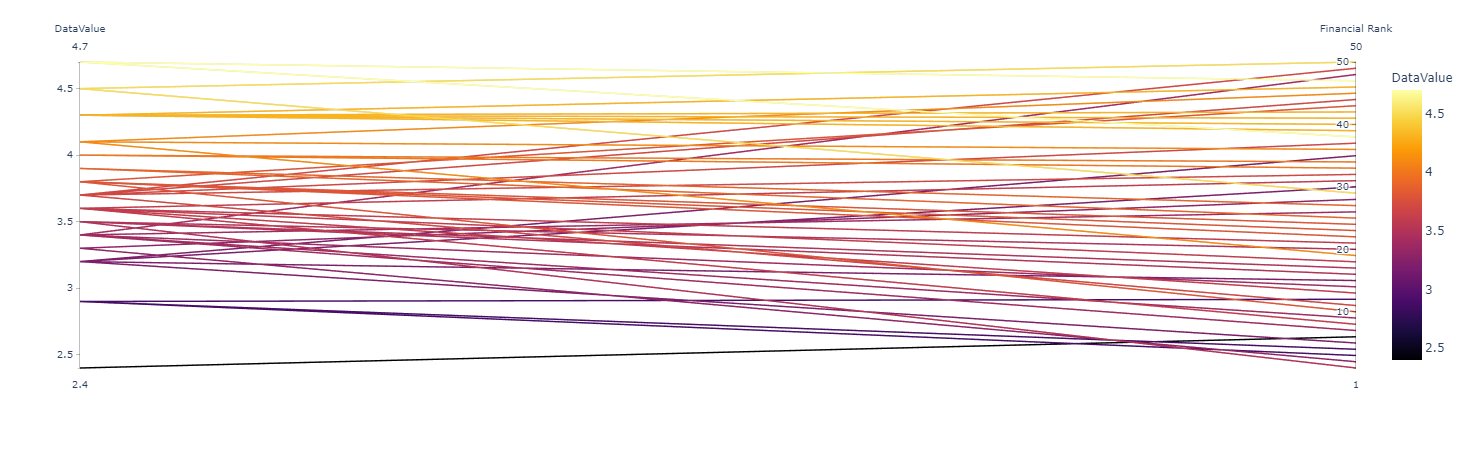

In [33]:
fig = px.parallel_coordinates(merged_mh_wb_data_2015,dimensions=['DataValue','Financial Rank'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

In [18]:
merged_mh_wb_data_2016= merged_mh_wb_data[merged_mh_wb_data['YearStart']==2016]

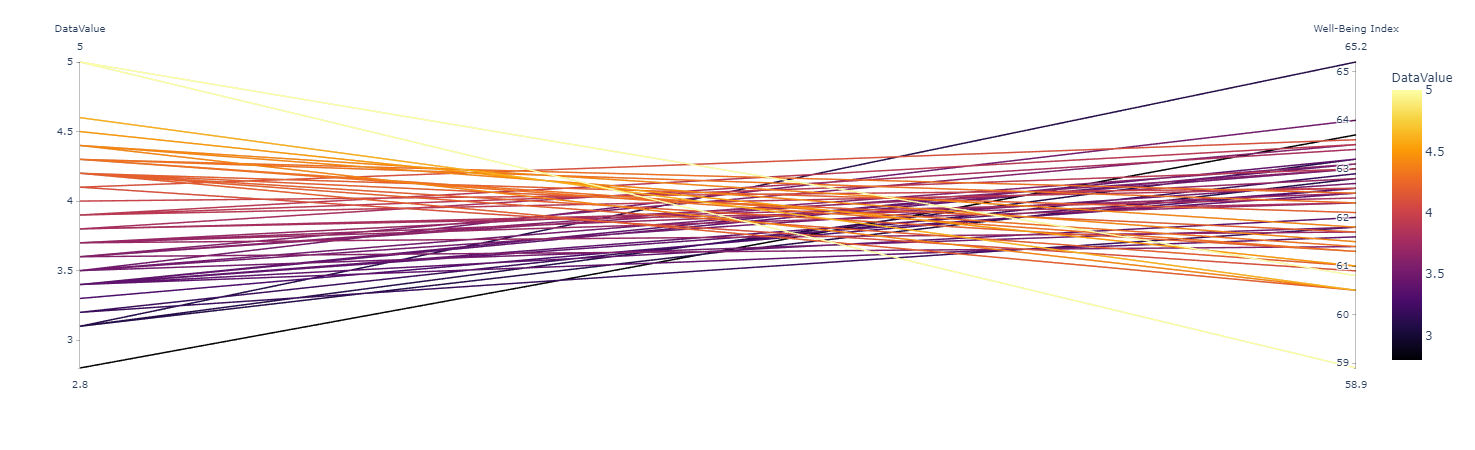

In [19]:
fig = px.parallel_coordinates(merged_mh_wb_data_2016,dimensions=['LocationDesc','DataValue','Well-Being Index'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

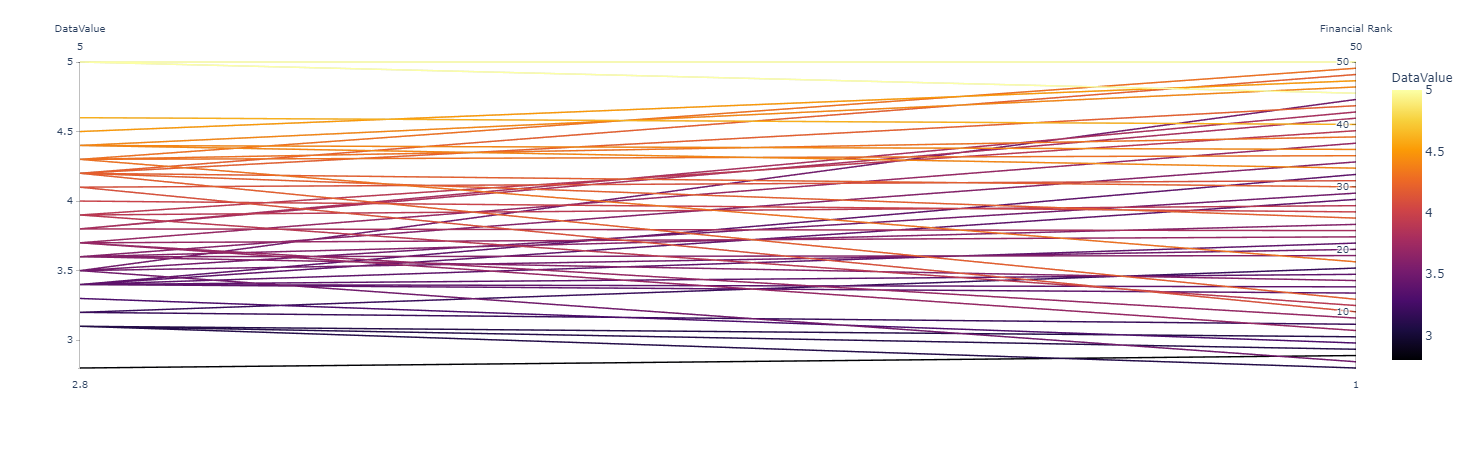

In [20]:
fig = px.parallel_coordinates(merged_mh_wb_data_2016,dimensions=['DataValue','Financial Rank'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

In [21]:
merged_mh_wb_data_2017= merged_mh_wb_data[merged_mh_wb_data['YearStart']==2017]

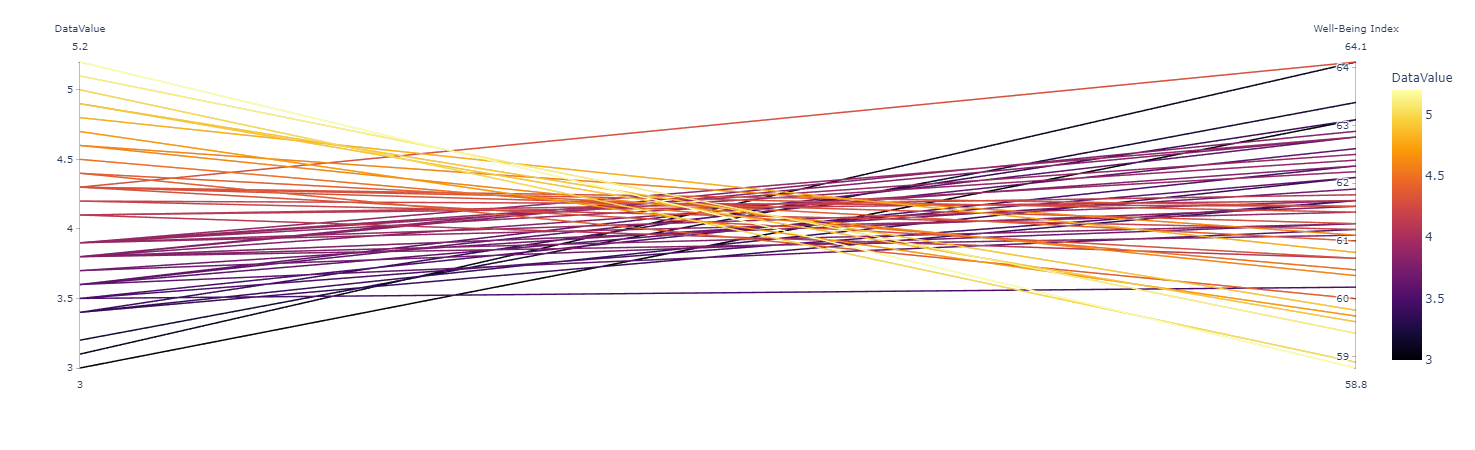

In [22]:
fig = px.parallel_coordinates(merged_mh_wb_data_2017,dimensions=['LocationDesc','DataValue','Well-Being Index'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

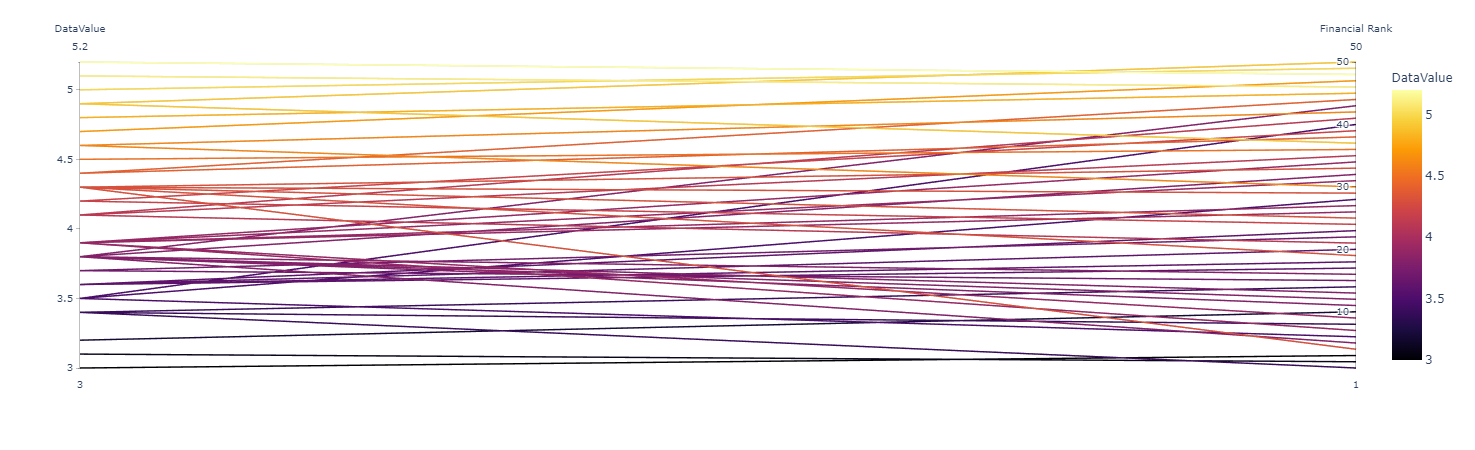

In [23]:
fig = px.parallel_coordinates(merged_mh_wb_data_2017,dimensions=['DataValue','Financial Rank'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

In [24]:
merged_mh_wb_data_2018= merged_mh_wb_data[merged_mh_wb_data['YearStart']==2018]

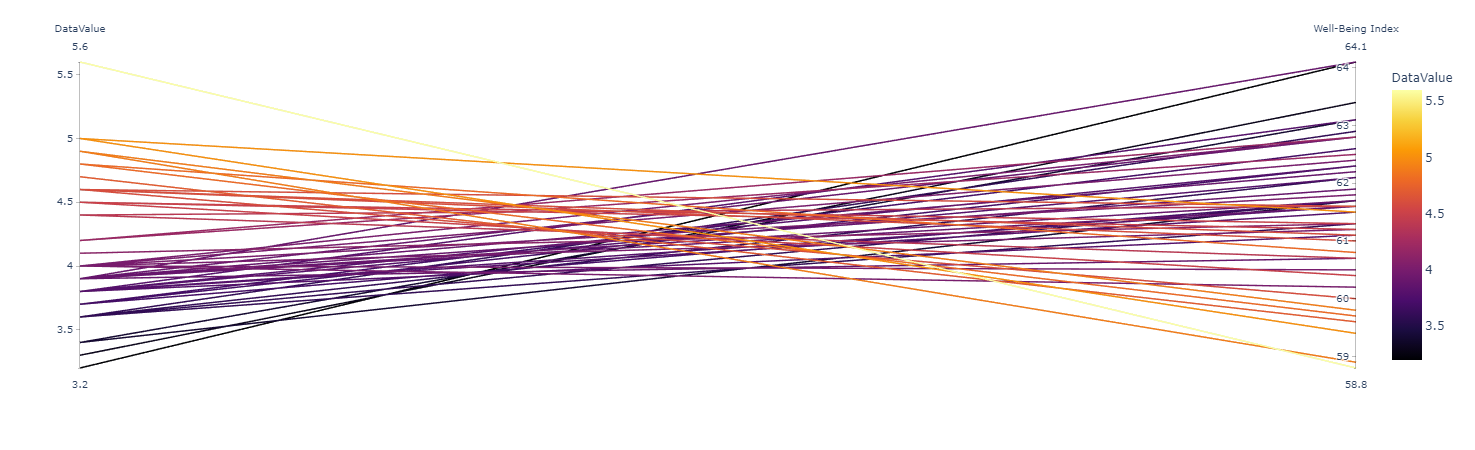

In [25]:
fig = px.parallel_coordinates(merged_mh_wb_data_2018,dimensions=['LocationDesc','DataValue','Well-Being Index'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

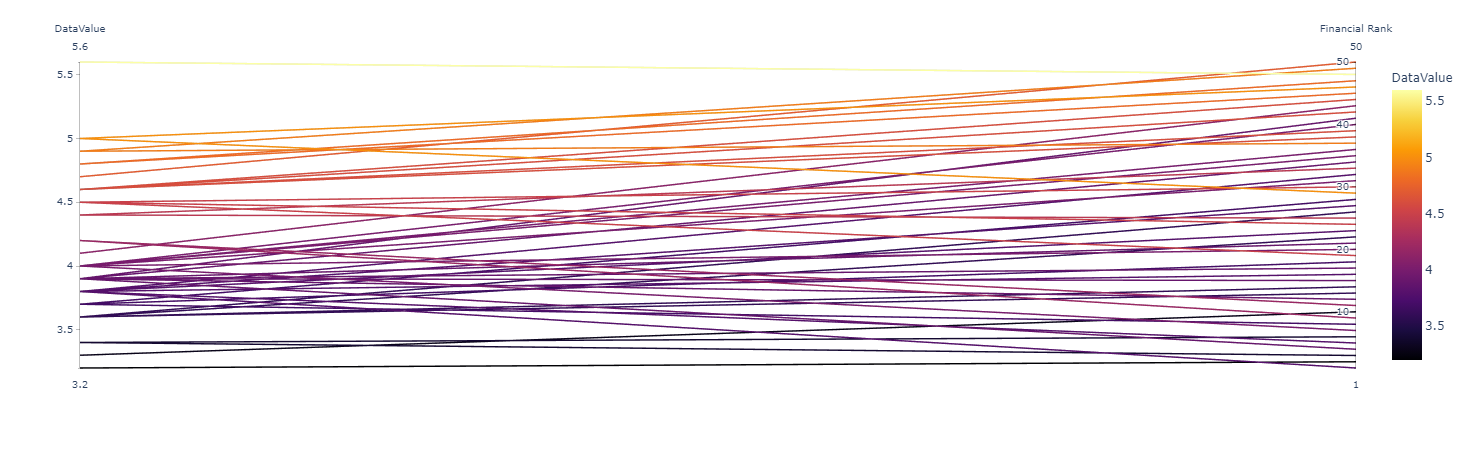

In [26]:
fig = px.parallel_coordinates(merged_mh_wb_data_2018,dimensions=['DataValue','Financial Rank'],color="DataValue", color_continuous_scale=px.colors.sequential.Inferno)
fig.show(renderer='jupyterlab')

**For all the years we can clearly see the strong negative correlation between mentally unhealthy days and well-being index and a strong positive correlation between mentally unhealthy days and financial rank**

## Mentally Unhealthy Days and Mental Health Care Access

In [27]:
mhca_df= pd.read_csv("mha_master.csv")

In [28]:
merged_mh_mhca_data= pd.merge(new_mh_data,mhca_df,how='left',left_on=['YearStart','LocationDesc'],right_on=['Year','State'])

In [29]:
merged_mh_mhca_data.dropna(inplace=True)
drop_cols= ['index','DataValueTypeID','State','Year']
merged_mh_mhca_data.drop(drop_cols,axis=1,inplace=True)
merged_mh_mhca_data = merged_mh_mhca_data.rename(columns={'%':'%withnoacces'})
merged_mh_mhca_data.head()

YearStart LocationDesc  DataValue  OVERALL  Unnamed: 0  Rank  %withnoacces
0       2015      Alabama        4.3  Overall        35.0  36.0          59.7
1       2015       Alaska        3.5  Overall        42.0  43.0          63.8
2       2015      Arizona        3.8  Overall        40.0  41.0          62.4
3       2015     Arkansas        4.7  Overall        16.0  17.0          53.8
4       2015   California        3.6  Overall        45.0  46.0          64.3

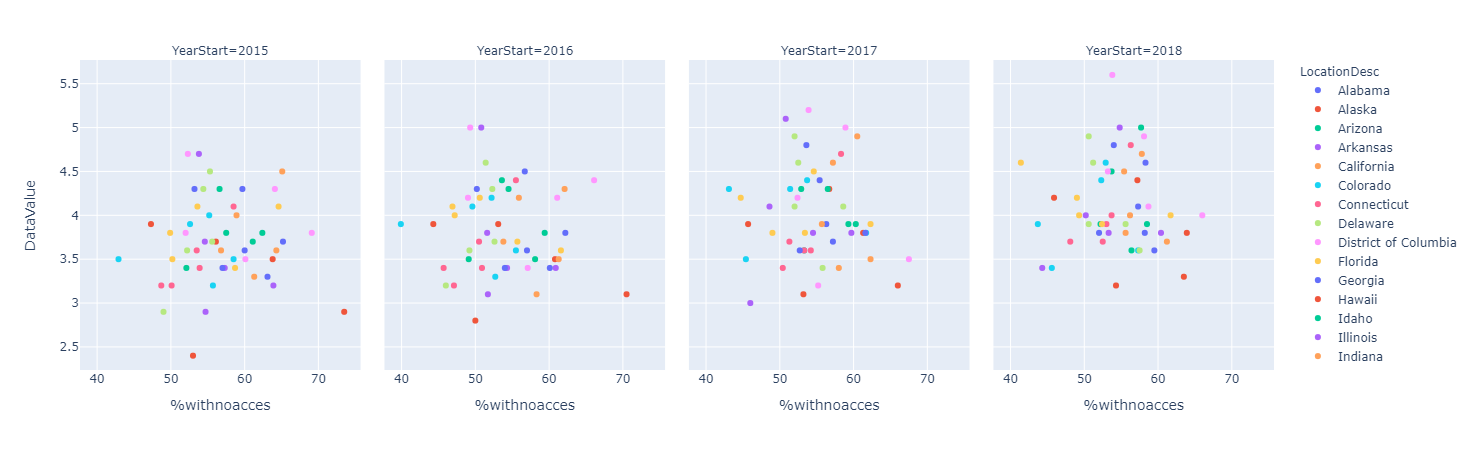

In [30]:
scatter_mha_access=px.scatter(merged_mh_mhca_data, x="%withnoacces", y="DataValue",color="LocationDesc" ,facet_col="YearStart")
scatter_mha_access.show(renderer="jupyterlab")

**Surprisingly there is almost no correlation between percentage of adults with no mental health care access in a state and amount of mentally unhealthy days.**